## **Etude sur données synthétiques :**

### **Importation des librairies**

In [328]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix


### **La lecture du dateset**

In [329]:
aggregation = pd.read_table("aggregation.txt",header = None) 
flame = pd.read_table("flame.txt",header = None)  
spiral = pd.read_table("spiral.txt", header = None)  

In [330]:
print(aggregation.shape)
print(flame.shape)
print(spiral.shape)

(788, 3)
(240, 3)
(312, 3)


*   **Aggregation:** 
*   **Nombre d'observations : 788**
*   **Nombre de variables : 2**
*   **Nombre de classes : 7**
***********************************************
*    **Flame:**
*   **Nombre d'observations : 240**
*   **Nombre de variables : 2**
*   **Nombre de classes : 2**
**********************************************
*   **Spiral**
*   **Nombre d'observations : 312**
*   **Nombre de variables : 2**
*   **Nombre de classes : 3**




In [331]:
print(aggregation.describe())

                0           1           2
count  788.000000  788.000000  788.000000
mean    19.566815   14.171764    3.770305
std      9.922042    8.089683    1.596305
min      3.350000    1.950000    1.000000
25%     11.150000    7.037500    2.000000
50%     18.225000   11.725000    4.000000
75%     30.700000   21.962500    5.000000
max     36.550000   29.150000    7.000000


In [332]:
print(flame.describe())

                0           1           2
count  240.000000  240.000000  240.000000
mean     7.323750   20.928542    1.637500
std      3.202509    3.383390    0.481727
min      0.500000   14.450000    1.000000
25%      5.250000   18.237500    1.000000
50%      7.300000   20.775000    2.000000
75%      9.312500   23.562500    2.000000
max     14.200000   27.800000    2.000000


In [333]:
print(spiral.describe())

                0           1           2
count  312.000000  312.000000  312.000000
mean    18.408173   16.344712    2.016026
std      7.299923    6.867232    0.815682
min      3.000000    2.900000    1.000000
25%     12.912500   11.337500    1.000000
50%     18.325000   16.050000    2.000000
75%     23.400000   21.362500    3.000000
max     31.950000   31.650000    3.000000


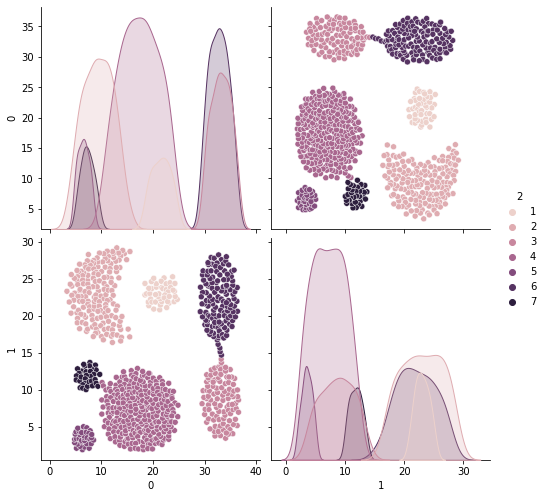

In [334]:
sns.pairplot(data=aggregation, hue=2, size=3.5)

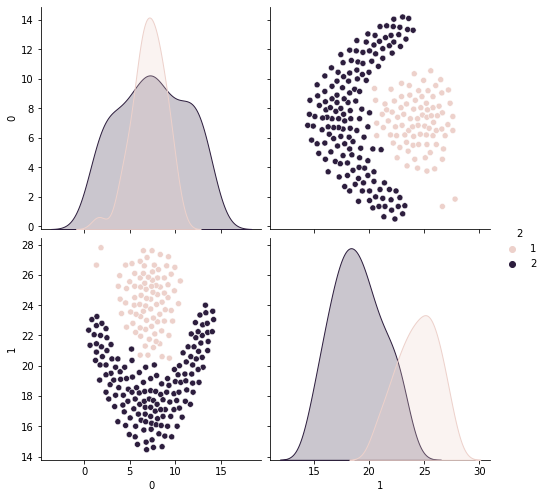

In [335]:
sns.pairplot(data=flame, hue=2, size=3.5)

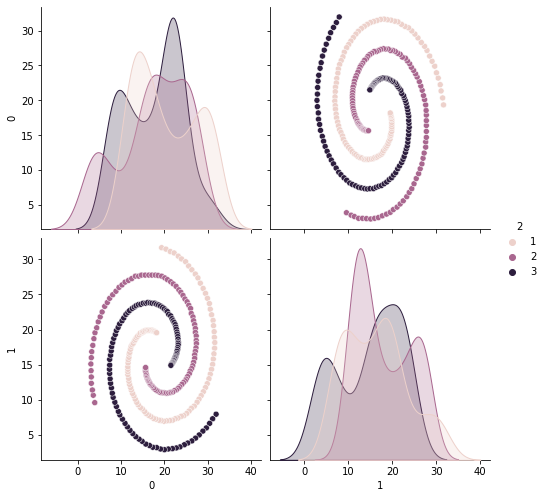

In [336]:
sns.pairplot(data=spiral, hue=2, size=3.5)

### **Normalisation avec StandardScaler**
### **Extraction des échantillons apprentissage et test**

In [337]:
sc1 = StandardScaler()
sc2 = StandardScaler()
sc3 = StandardScaler()

X_aggregation = sc1.fit_transform(aggregation.iloc[:,0:2].values)
X_flame = sc2.fit_transform(flame.iloc[:,0:2].values)
X_spiral = sc3.fit_transform(spiral.iloc[:,0:2].values)

Y_aggregation = aggregation.iloc[:,2].values
Y_flame = flame.iloc[:,2].values
Y_spiral = spiral.iloc[:,2].values

X_aggregation, X_aggregation_test, Y_aggregation, Y_aggregation_test = train_test_split(X_aggregation, Y_aggregation, test_size = 0.2)
X_flame, X_flame_test, Y_flame, Y_flame_test = train_test_split(X_flame, Y_flame, test_size = 0.2)
X_spiral, X_spiral_test, Y_spiral, Y_spiral_test = train_test_split(X_spiral, Y_spiral, test_size = 0.2)

### **Tune scaled KNN**

In [338]:
# Tune scaled KNN
rescaledX = X_aggregation
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_aggregation)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'n_neighbors': 1}
1.000000 (0.000000) with: {'n_neighbors': 1}
0.996825 (0.006349) with: {'n_neighbors': 3}
0.996825 (0.006349) with: {'n_neighbors': 5}
0.996825 (0.006349) with: {'n_neighbors': 7}
0.996825 (0.006349) with: {'n_neighbors': 9}
0.996825 (0.006349) with: {'n_neighbors': 11}
0.996825 (0.006349) with: {'n_neighbors': 13}
0.996825 (0.006349) with: {'n_neighbors': 15}
0.996825 (0.006349) with: {'n_neighbors': 17}
0.996825 (0.006349) with: {'n_neighbors': 19}
0.996825 (0.006349) with: {'n_neighbors': 21}


### **Tune scaled SVM**

In [339]:
# Tune scaled SVM
rescaledX = X_aggregation
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'rbf']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_aggregation)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.996825 using {'C': 0.3, 'kernel': 'linear'}
0.971429 (0.021058) with: {'C': 0.1, 'kernel': 'linear'}
0.938095 (0.031306) with: {'C': 0.1, 'kernel': 'rbf'}
0.996825 (0.006349) with: {'C': 0.3, 'kernel': 'linear'}
0.996825 (0.006349) with: {'C': 0.3, 'kernel': 'rbf'}
0.996825 (0.006349) with: {'C': 0.5, 'kernel': 'linear'}
0.996825 (0.006349) with: {'C': 0.5, 'kernel': 'rbf'}
0.996825 (0.006349) with: {'C': 0.7, 'kernel': 'linear'}
0.996825 (0.006349) with: {'C': 0.7, 'kernel': 'rbf'}
0.996825 (0.006349) with: {'C': 0.9, 'kernel': 'linear'}
0.996825 (0.006349) with: {'C': 0.9, 'kernel': 'rbf'}
0.996825 (0.006349) with: {'C': 1.0, 'kernel': 'linear'}
0.996825 (0.006349) with: {'C': 1.0, 'kernel': 'rbf'}
0.996825 (0.006349) with: {'C': 1.3, 'kernel': 'linear'}
0.996825 (0.006349) with: {'C': 1.3, 'kernel': 'rbf'}
0.996825 (0.006349) with: {'C': 1.5, 'kernel': 'linear'}
0.996825 (0.006349) with: {'C': 1.5, 'kernel': 'rbf'}
0.996825 (0.006349) with: {'C': 1.7, 'kernel': 'linear'}
0.9

### **fonction pour effuctuer apprentissage et test, ensuite afficher comparaison graphique**
### **les algorithemes utiliser : Bayesien Naïf, KNN, LDA, QDA, random forest, CART, linear SVM, gausian SVM, logistic regression.**

In [344]:
def train_models(X_train,y_train,X_test,Y_test):
    #nf
    nf=GaussianNB()
    nf.fit(X_train,y_train)
    
    print("nf",': accuaracy=',(accuracy_score(Y_test,nf.predict(X_test))),
              'erreur=',(1-accuracy_score(Y_test,nf.predict(X_test)))) 
    nf_a=accuracy_score(Y_test,nf.predict(X_test))
    nf_f1=f1_score(Y_test,nf.predict(X_test),average='micro')
    #KNN
    knn=KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    
    print("knn",': accuaracy=',(accuracy_score(Y_test,knn.predict(X_test))),
              'erreur=',(1-accuracy_score(Y_test,knn.predict(X_test))))
    knn_a=accuracy_score(Y_test,knn.predict(X_test))
    knn_f1=f1_score(Y_test,knn.predict(X_test),average='micro')
    #LDA
    lda=LDA()
    lda.fit(X_train,y_train)
    
    print("LDA",': accuaracy=',(accuracy_score(Y_test,lda.predict(X_test))),
              'erreur=',(1-accuracy_score(Y_test,lda.predict(X_test))))  
    LDA_a=accuracy_score(Y_test,lda.predict(X_test))
    LDA_f1=f1_score(Y_test,lda.predict(X_test),average='micro')
    #QDA
    qda=QuadraticDiscriminantAnalysis()
    qda.fit(X_train,y_train)
    
    print("QDA",': accuaracy=',(accuracy_score(Y_test,qda.predict(X_test))),
              'erreur=',(1-accuracy_score(Y_test,qda.predict(X_test))))    
    QDA_a=accuracy_score(Y_test,qda.predict(X_test))
    QDA_f1=f1_score(Y_test,qda.predict(X_test),average='micro')
    #random forest
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    
    print("random forest",': accuaracy=',(accuracy_score(Y_test,rf.predict(X_test))),
              'erreur=',(1-accuracy_score(Y_test,rf.predict(X_test))))  
    RF_a=accuracy_score(Y_test,rf.predict(X_test))
    RF_f1=f1_score(Y_test,rf.predict(X_test),average='micro')
    #decision Tree
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    
    print("decision Tree",': accuaracy=',(accuracy_score(Y_test,dt.predict(X_test))),
              'erreur=',(1-accuracy_score(Y_test,dt.predict(X_test))))  
    DT_a=accuracy_score(Y_test,dt.predict(X_test))
    DT_f1=f1_score(Y_test,dt.predict(X_test),average='micro')
    #linear SVM
    l_svm=SVC(kernel='linear',C=0.5)
    l_svm.fit(X_train,y_train)
    
    print("linear SVM",': accuaracy=',(accuracy_score(Y_test,l_svm.predict(X_test))),
              'erreur=',(1-accuracy_score(Y_test,l_svm.predict(X_test))))  
    svm_a=accuracy_score(Y_test,l_svm.predict(X_test))
    svm_f1=f1_score(Y_test,l_svm.predict(X_test),average='micro')
    #gausian SVM
    g_svm=SVC(kernel='rbf')
    g_svm.fit(X_train,y_train)
    
    print("gausian SVM",': accuaracy=',(accuracy_score(Y_test,g_svm.predict(X_test))),
              'erreur=',(1-accuracy_score(Y_test,g_svm.predict(X_test))))  
    gsvm_a=accuracy_score(Y_test,g_svm.predict(X_test))
    gsvm_f1=f1_score(Y_test,g_svm.predict(X_test),average='micro')
    #lg
    lg=LogisticRegression()
    lg.fit(X_train,y_train)
    
    print("lg",': accuaracy=',(accuracy_score(Y_test,lg.predict(X_test))),
              'erreur=',(1-accuracy_score(Y_test,lg.predict(X_test))))  
    lg_a=accuracy_score(Y_test,lg.predict(X_test))
    lg_f1=f1_score(Y_test,lg.predict(X_test),average='micro')
    
    results ={'Accuracy': [nf_a*100,knn_a*100,LDA_a*100,QDA_a*100,RF_a*100,DT_a*100,svm_a*100,gsvm_a*100,lg_a*100],
            }
    index = ["Bayesien Naïf","KNN","LDA","QDA","random forest","CART","linear SVM","gaussian SVM","logistic regression"]
    results =pd.DataFrame(results,index=index)
    
    r=results.plot(kind='bar',title='Comparaison entre les modèles ',figsize=(22,8),color = ['royalblue','teal'],rot=10,fontsize=15)
    for p in r.patches:
        r.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (1,8), 
                   textcoords = 'offset points',
                   fontsize=12)
    return [nf,knn,lda,qda,l_svm,g_svm,lg,dt,rf],  ['naive bayes', 'knn', 'LDA', 'QDA', 'linear SVM', 'gaussian svm', 'logistic regression', 'decision tree', 'random forest' ]                

### **L'étude sur la dataset aggregation**

nf : accuaracy= 1.0 erreur= 0.0
knn : accuaracy= 1.0 erreur= 0.0
LDA : accuaracy= 0.9936708860759493 erreur= 0.006329113924050667
QDA : accuaracy= 1.0 erreur= 0.0
random forest : accuaracy= 1.0 erreur= 0.0
decision Tree : accuaracy= 1.0 erreur= 0.0
linear SVM : accuaracy= 1.0 erreur= 0.0
gausian SVM : accuaracy= 1.0 erreur= 0.0
lg : accuaracy= 1.0 erreur= 0.0


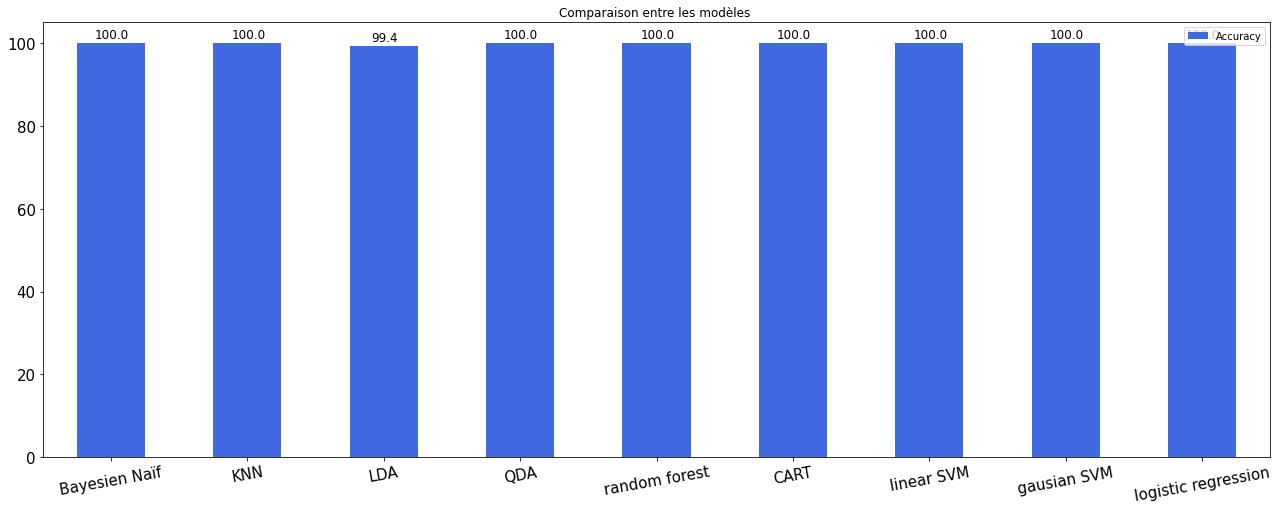

In [345]:
models,names=train_models(X_aggregation,Y_aggregation,X_aggregation_test,Y_aggregation_test)

### **confusion matrix**

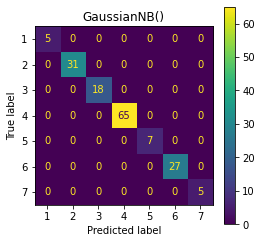

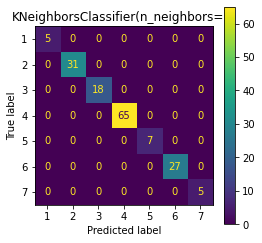

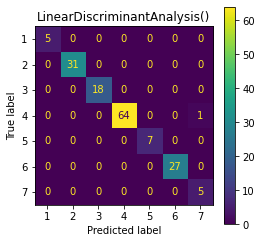

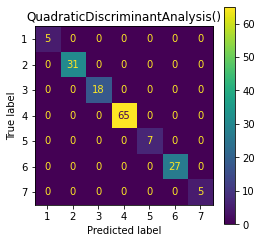

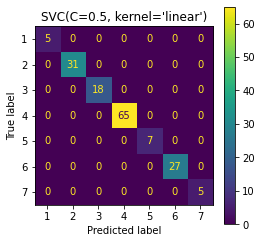

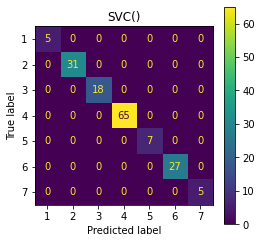

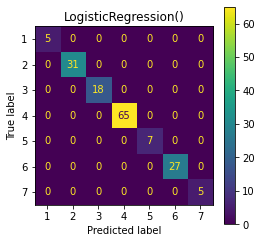

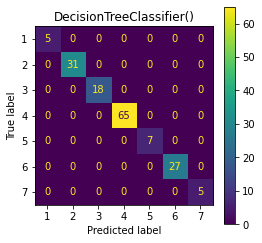

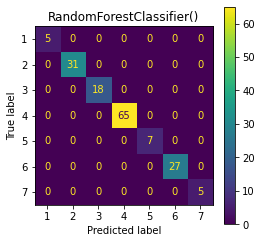

In [346]:
for i in models:
    #confusion matrix 
    fig, ax = plt.subplots(figsize=(4,4))
    plt.title(i)
    plot_confusion_matrix(i,X_aggregation_test,Y_aggregation_test,display_labels=["1", "2","3","4","5","6","7"],ax=ax)


### **L'étude sur la dataset flame**

nf : accuaracy= 0.9791666666666666 erreur= 0.02083333333333337
knn : accuaracy= 1.0 erreur= 0.0
LDA : accuaracy= 0.8958333333333334 erreur= 0.10416666666666663
QDA : accuaracy= 0.9791666666666666 erreur= 0.02083333333333337
random forest : accuaracy= 1.0 erreur= 0.0
decision Tree : accuaracy= 0.9791666666666666 erreur= 0.02083333333333337
linear SVM : accuaracy= 0.875 erreur= 0.125
gausian SVM : accuaracy= 1.0 erreur= 0.0
lg : accuaracy= 0.875 erreur= 0.125


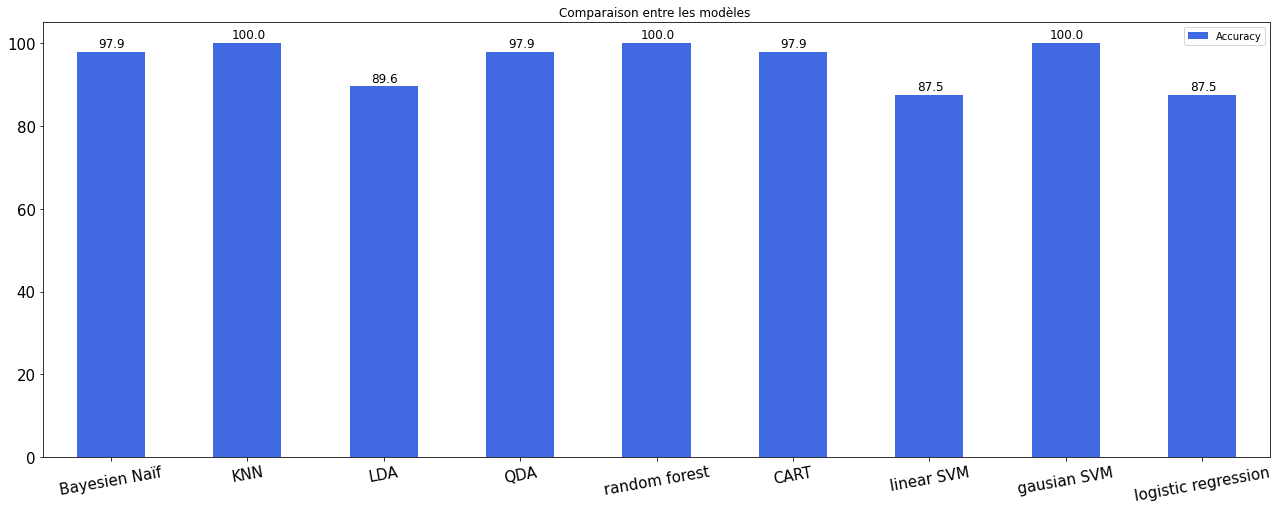

In [347]:
models,names=train_models(X_flame,Y_flame,X_flame_test,Y_flame_test)

### **confusion matrix**

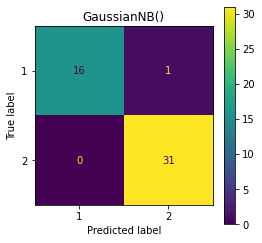

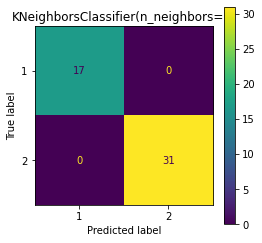

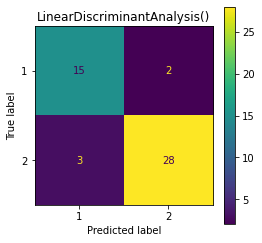

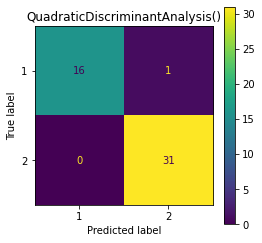

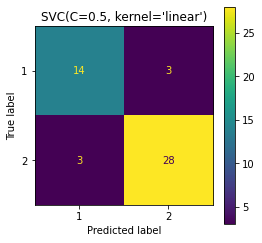

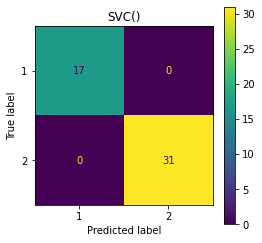

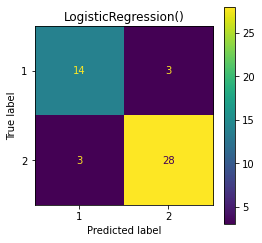

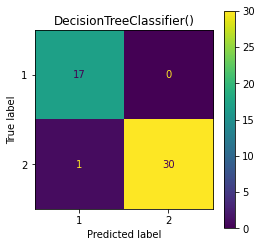

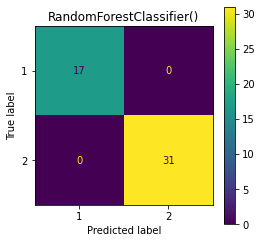

In [348]:
for j in models:
    #confusion matrix 
    fig1, ax = plt.subplots(figsize=(4,4))
    plt.title(j)
    plot_confusion_matrix(j,X_flame_test,Y_flame_test,display_labels=["1", "2"],ax=ax)


### **L'étude sur la dataset spiral**

nf : accuaracy= 0.3968253968253968 erreur= 0.6031746031746033
knn : accuaracy= 1.0 erreur= 0.0
LDA : accuaracy= 0.3492063492063492 erreur= 0.6507936507936508
QDA : accuaracy= 0.36507936507936506 erreur= 0.6349206349206349
random forest : accuaracy= 1.0 erreur= 0.0
decision Tree : accuaracy= 1.0 erreur= 0.0
linear SVM : accuaracy= 0.36507936507936506 erreur= 0.6349206349206349
gausian SVM : accuaracy= 1.0 erreur= 0.0
lg : accuaracy= 0.3492063492063492 erreur= 0.6507936507936508


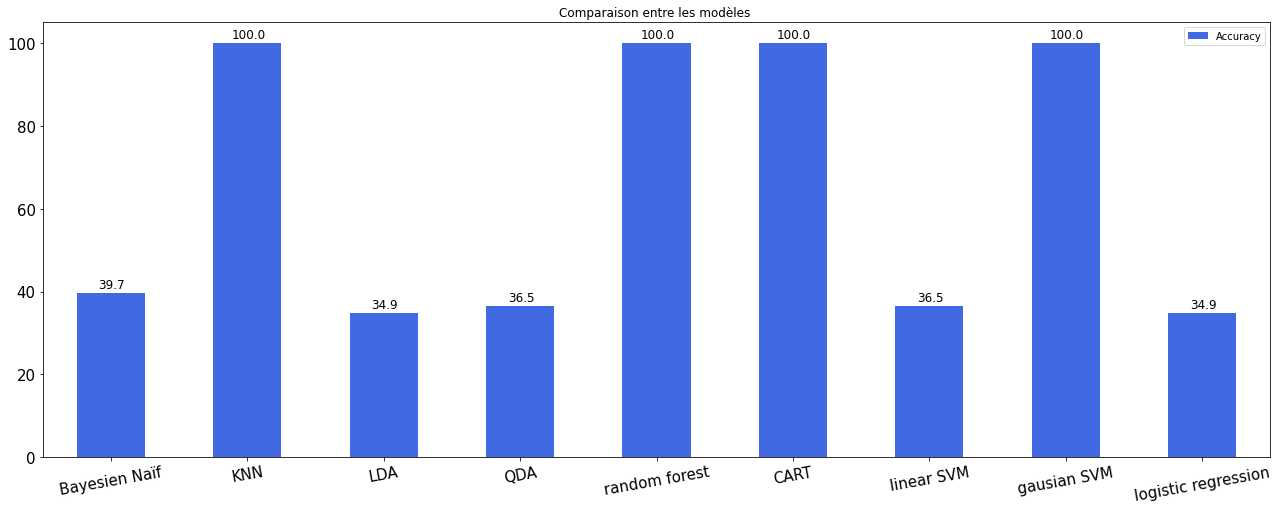

In [349]:
models,names=train_models(X_spiral,Y_spiral,X_spiral_test,Y_spiral_test)

### **confusion matrix**

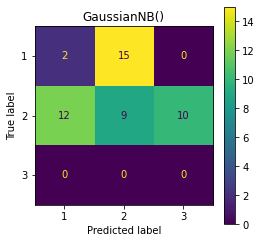

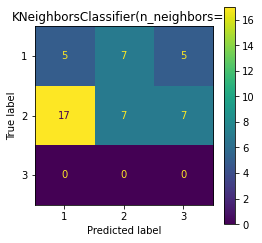

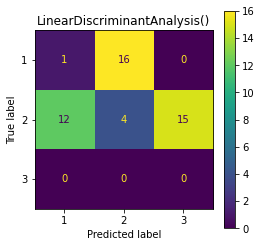

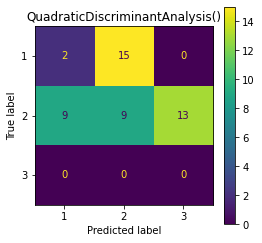

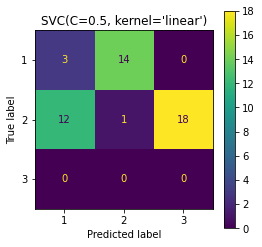

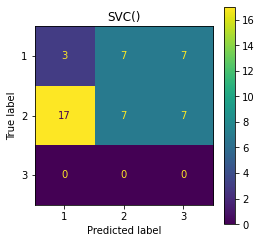

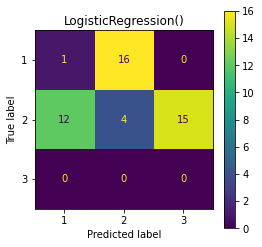

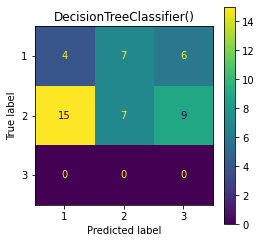

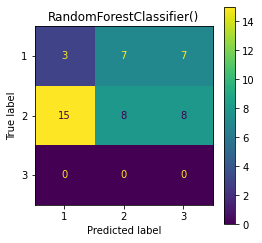

In [350]:
for k in models:
    #confusion matrix 
    fig2, ax = plt.subplots(figsize=(4,4))
    plt.title(k)
    plot_confusion_matrix(k,X_flame_test,Y_flame_test,display_labels=["1", "2","3"],ax=ax)